<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

In [ ]:
# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("C:\\Users\\stoll\\iod_ipynb\\DATA\\housing.data", header=None, names=names, delim_whitespace=True)

In [3]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

In [ ]:
np.sqrt(len(data.RM))

22.494443758403985

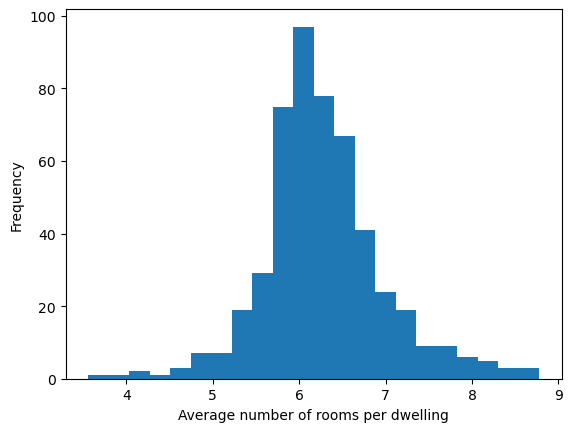

In [ ]:
#  ANSWER
plt.hist(data.RM, bins=22)
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Frequency')
plt.show();

##### 2. Plot Histogram of `MEDV`

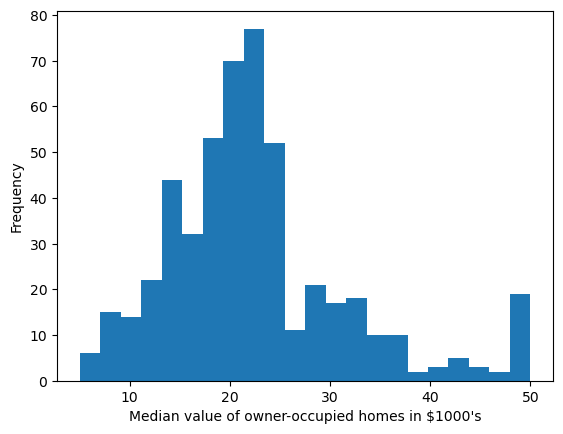

In [ ]:
# ANSWER
plt.hist(data.MEDV, bins=22)
plt.xlabel("Median value of owner-occupied homes in $1000's") #Boston housing dataset from 1978
plt.ylabel('Frequency')
plt.show();

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

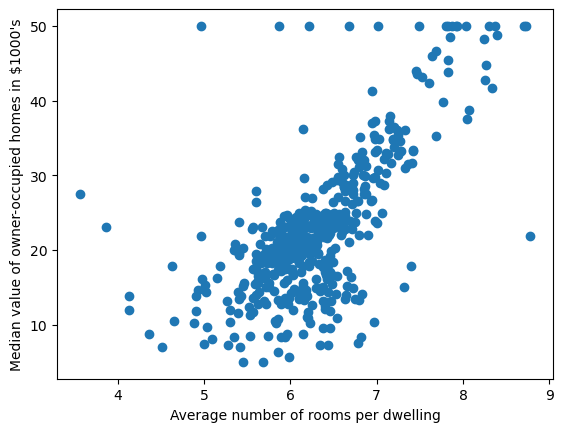

In [ ]:
# ANSWER
plt.scatter(data=data, x='RM', y='MEDV')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

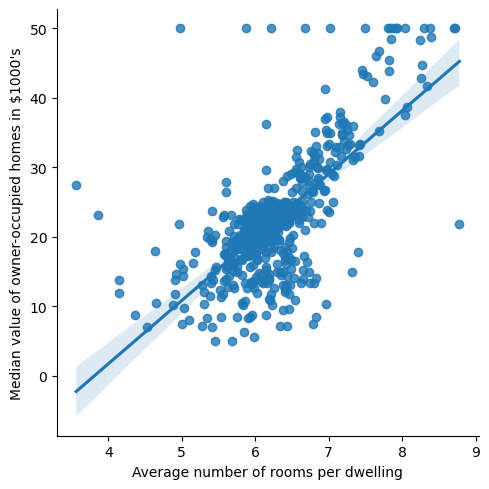

In [ ]:
# ANSWER
# lmplot from Seaborn plots regression fit over a scatter plot
sns.lmplot(data=data, x='RM', y='MEDV')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

In [ ]:
data.corr() #0.7

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


##### 3.B Is there any trend? State your observation.

**ANSWER:**: Positive relationship between number of rooms and house value, i.e. the more rooms the more expensive the house

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [ ]:
# ANSWER
alpha = 0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataset.

In [20]:
# ANSWER
# Subset median house price for number of rooms
np.random.seed(42)
large = data[data.RM > 6]['MEDV'].sample(100, random_state=42)
small = data[data.RM <= 6]['MEDV'].sample(100, random_state=42)

In [21]:
len(small)

100

In [22]:
small.sample(3)

50     19.7
79     20.3
487    20.6
Name: MEDV, dtype: float64

##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

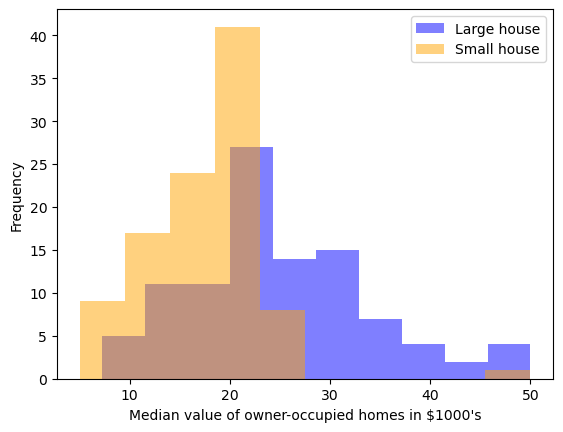

In [23]:
# ANSWER
plt.hist(large, bins=10, color='blue', label = 'Large house', alpha=0.5)
plt.hist(small, bins=10, color='orange', label = 'Small house',alpha=0.5)
plt.xlabel("Median value of owner-occupied homes in $1000's")
plt.ylabel('Frequency')
plt.legend()
plt.show();

##### 7. Calculate Variance

Calculate variance for both samples.

In [38]:
# ANSWER
small.var(), large.var()

(32.564099999999996, 84.00822121212123)

In [45]:
np.var(small, ddof=1), np.var(large, ddof=1) 

(32.564099999999996, 84.00822121212123)

In [40]:
np.std(small), np.std(large) 

(5.677892126484968, 9.119656736961101)

##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [41]:
# ANSWER
sp = np.sqrt((small.var() + large.var()/2))
print('std dev:', sp)

std dev: 8.635288681107344


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [46]:
# ANSWER
N=100

t = (large.mean() - small.mean()) / (sp * np.sqrt(2/N))
t

6.436217138039617

##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [31]:
# ANSWER
df = 2 * N - 2
df

198

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [43]:
# ANSWER
p = 1 - stats.t.cdf(abs(t), df=df)

print("t = ", t)
print("p = ", p)

t =  6.436217138039617
p =  4.5211512311738034e-10


pvalue is smaller than 0.05 **=> Accept alternative hypothesis**

#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [33]:
# ANSWER
def test_significance(p_value, alpha=0.05):
    if p_value < alpha:
        print('reject null hypothesis')
    else:
        print('accept null hypothesis')        

In [34]:
test_significance(0.27), test_significance(0.0001)

accept null hypothesis
reject null hypothesis


(None, None)

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [ ]:
# ANSWER

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.

> ttest_ind

In [35]:
# ANSWER
t_statistic, p_value = stats.ttest_ind(small, large)

print("t_statistic =",t_statistic)
print("p_value =",p_value)

t_statistic = -7.27989011329426
p_value = 7.686055825655334e-12


pvalue is smaller than 0.05 **=> Accept alternative hypothesis**



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



